In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [148]:
a = 1e-1
b = 1e-2
l = 1
vbar = 1e-3
sigma = 1
k = 2 * (l * b * sigma / vbar)**2
N = 1000
S = 100

In [150]:
V2mean = [b**2 * sigma**2 * (1 - a**(2*(n+1))/(1 - a**2)) for n in range(0, N)]

X2approx = k * np.arange(0, N)

In [ ]:
V = np.zeros((N, S))
X = np.zeros((N, S))
dt = np.zeros((N, S))
t = np.zeros((N, S))

ustar = scipy.stats.uniform.rvs(size=(N, S))
u = scipy.stats.norm.rvs(scale=sigma, size=(N, S))

for s in range(0, S):
    for (i, n) in enumerate(range(0, N-1)):
        V[n+1, s] = a * V[n, s] + b * u[n, s]
        dt[n, s] = - l * np.log(ustar[n, s]) / abs(vbar - V[0, s])
        t[n+1, s] = t[n, s] + dt[n, s]
        X[n+1, s] = X[n, s] + V[n, s] * dt[n, s]


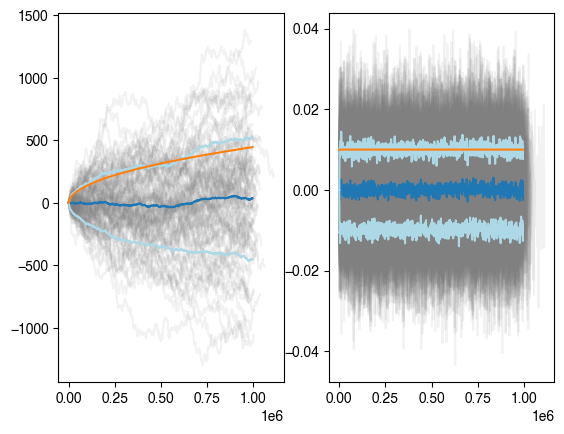

In [152]:
fig, axs = plt.subplots(1, 2)

axs[0].plot(t, X, color='grey', alpha=0.1)
axs[0].plot(t.mean(axis=1), X.mean(axis=1))
axs[0].plot(t.mean(axis=1), X.mean(axis=1) + X.std(axis=1), color='lightblue')
axs[0].plot(t.mean(axis=1), X.mean(axis=1) - X.std(axis=1), color='lightblue')
axs[0].plot(t.mean(axis=1), np.sqrt(X2approx))

axs[1].plot(t, V, color='grey', alpha=0.1)
axs[1].plot(t.mean(axis=1), V.mean(axis=1))
axs[1].plot(t.mean(axis=1), V.mean(axis=1) + V.std(axis=1), color='lightblue')
axs[1].plot(t.mean(axis=1), V.mean(axis=1) - V.std(axis=1), color='lightblue')
axs[1].plot(t.mean(axis=1), np.sqrt(V2mean))

plt.show()